**Loading Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Ingestion**

In [ ]:
hpp = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Displaying Data**

In [ ]:
hpp.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data Verification**

In [ ]:
train=train.iloc[:, 0:]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test=test.iloc[:, 0:]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
#Let's merge the train and test data and inspect the data type
merged = pd.concat([train, test], axis=0, sort=True)
display(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     43
int64      26
float64    12
dtype: int64

Dimensions of data: (2919, 81)


In [ ]:
#Extracting numerical variables first
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
display(num_merged.head(3))
print('\n')
display(num_merged.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2001,2002,2008


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

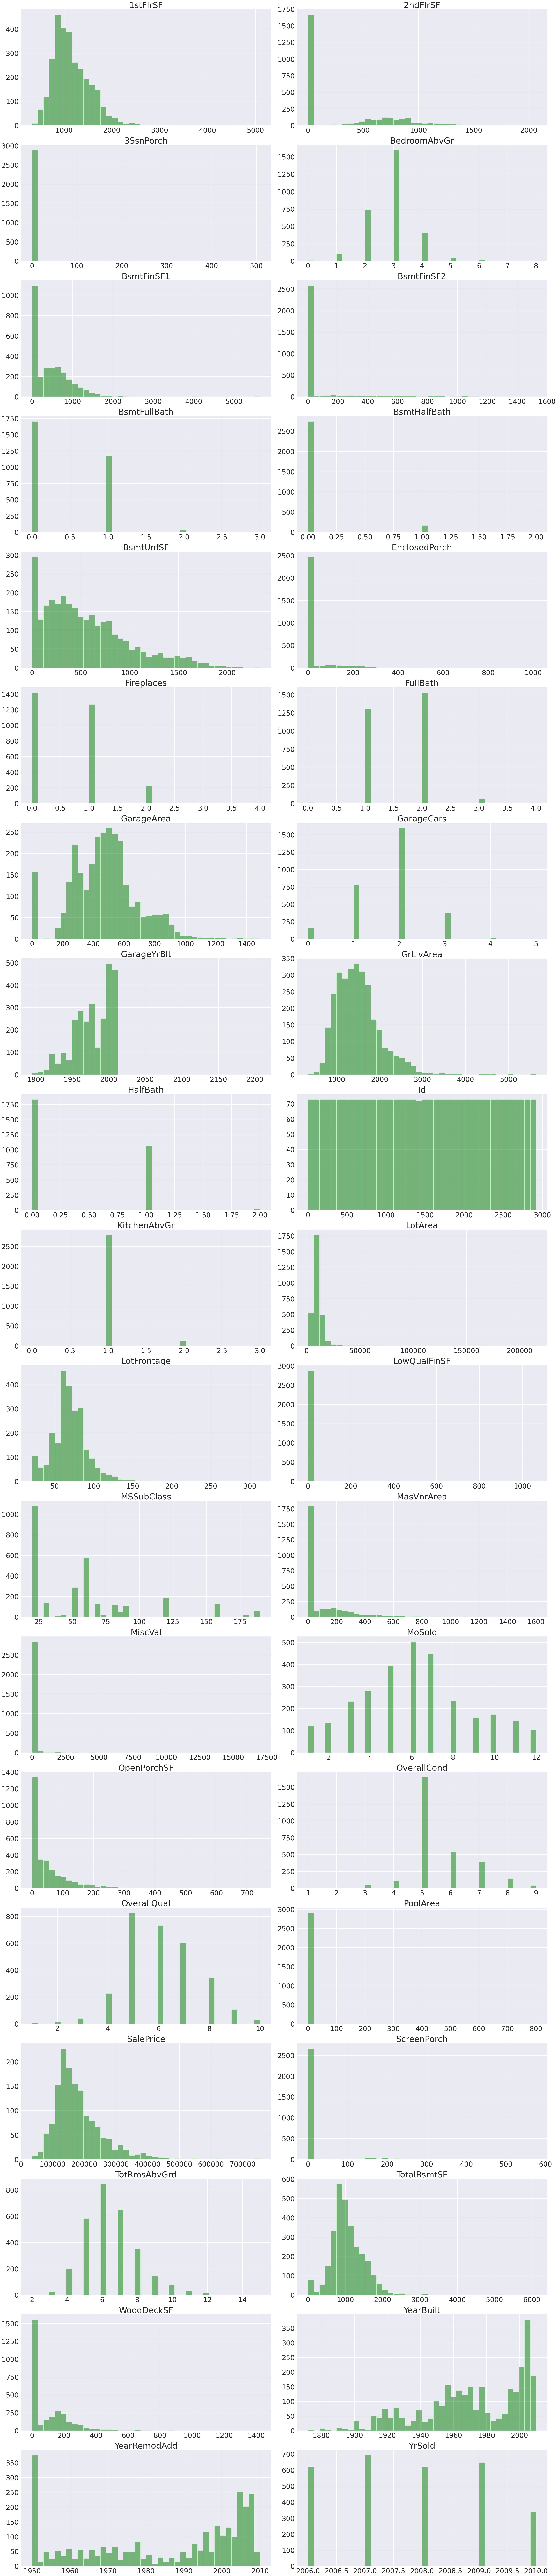

In [ ]:
#'Plot histogram of numerical variables to validate Pandas intuition

def draw_histograms(df, vars, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(vars):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])
    plt.show()
    
draw_histograms(num_merged, num_merged.columns, 19, 2)

**Correlation**

In [ ]:
corr_matrix = train.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False).drop(['SalePrice'])
corr_matrix.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,SalePrice
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52
YearRemodAdd,0.51


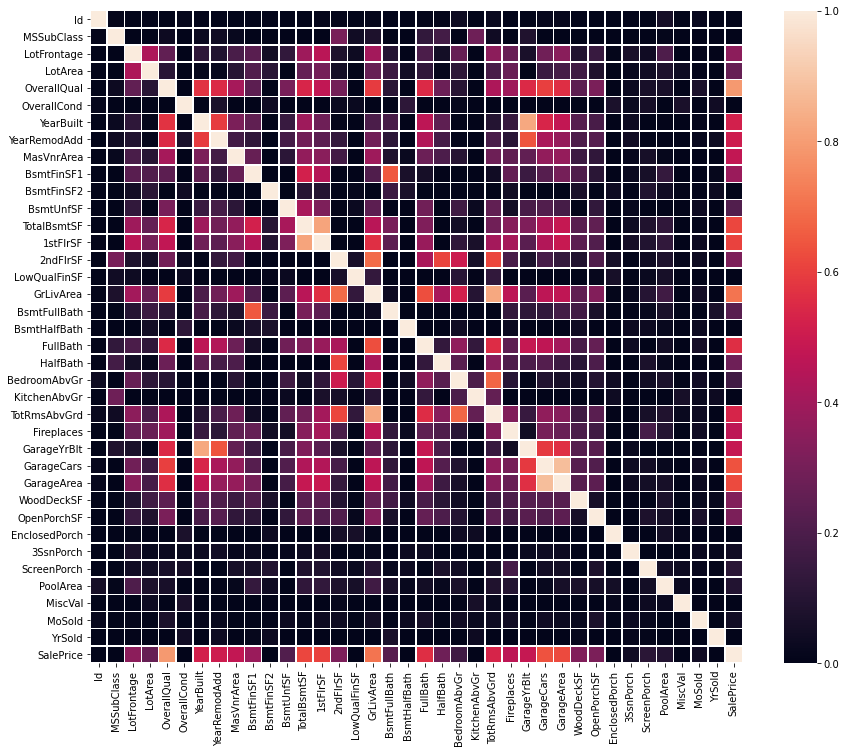

In [ ]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

We could easily derive that a strong correlation has been observed in between 'SalePrice' (depended variable) and 'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' 'GarageArea' etc( Independed variable).

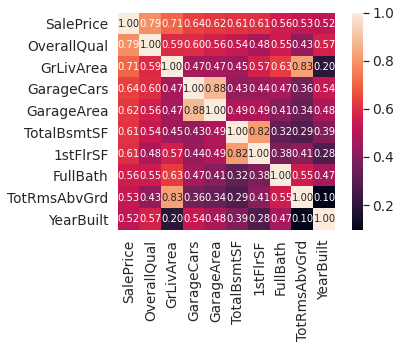

In [ ]:
# **SalePrice Corrlation**

k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Also observed that the following features and their respective values, are also influencing the SalePrice

MSZoning = RL <br>
Street = Pav <br>
LotArea <br>
LandContour = Lvl  <br>
Utilities = AllPub <br>
LandSlope = Gtl <br>
BldgType = 1Fam <br>
HouseStyle=1Story, 2Story <br>
Condition1 = Norm <br>
Condition2 = Norm <br>
RoofMatl = CompShg <br>
RoofStyle = Hip <br>
Foundation = PConc <br>
BsmtFinType1 = GLQ <br>
Heating = GasA <br>
HeatingQC = Ex <br>
CentralAir = Y <br>
Electrical = SBrkr <br>
KitchenQual = Ex, Gd <br>
Functional = Typ, Mod <br>
FireplaceQu = Ex, Gd <br>
GarageType = Attchd, BuiltIn <br>
GarageCars = 3 <br>
PavedDrive = Y <br>
SaleType = New, WD <br>
Needs to further analyze to see their involvement in SalePrice

**Exploratory Data Analysis**

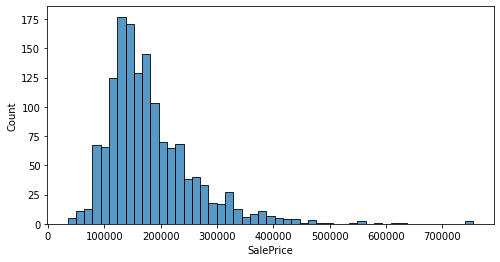

In [ ]:
# Analysing 'Sale Price'

plt.figure(figsize=(8,4))
sns.histplot(train['SalePrice'])

**Missing Values & Data Tuning**

In [ ]:
# Calculating Missing Values

missing = pd.concat([train.isna().sum().sort_values(ascending = False), train.dtypes], axis=1, keys=['Total', 'Type'])
missing[missing['Total'] > 0]

,Total,Type
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageCond,81,object
GarageType,81,object
GarageYrBlt,81,float64
GarageFinish,81,object


In [ ]:
# Identifying & Removing Outliers

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
#Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables & Check the Datatypes after correlation

merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
merged.dtypes.value_counts()

object     48
int64      21
float64    12
dtype: int64

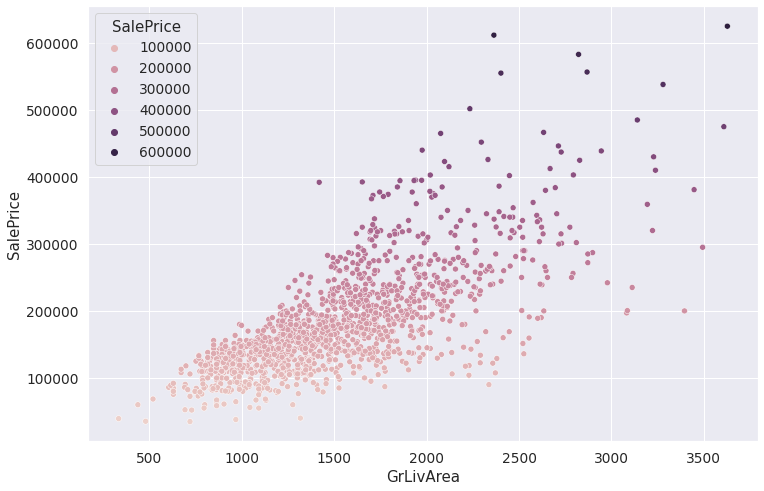

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train,hue='SalePrice')

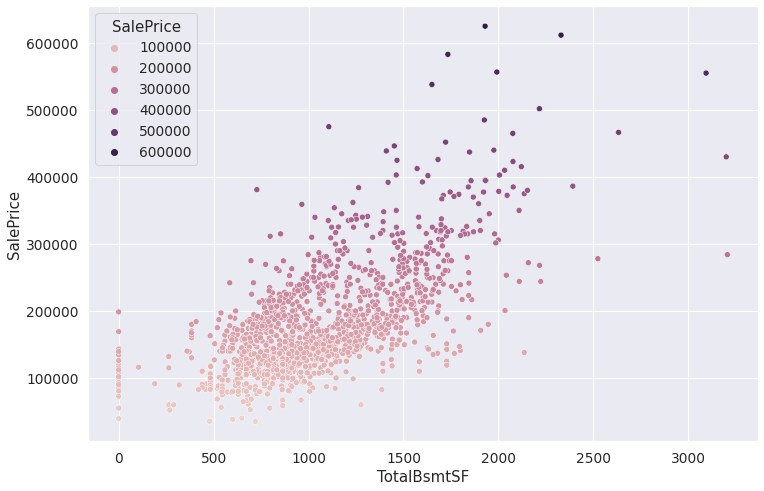

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train,hue='SalePrice')

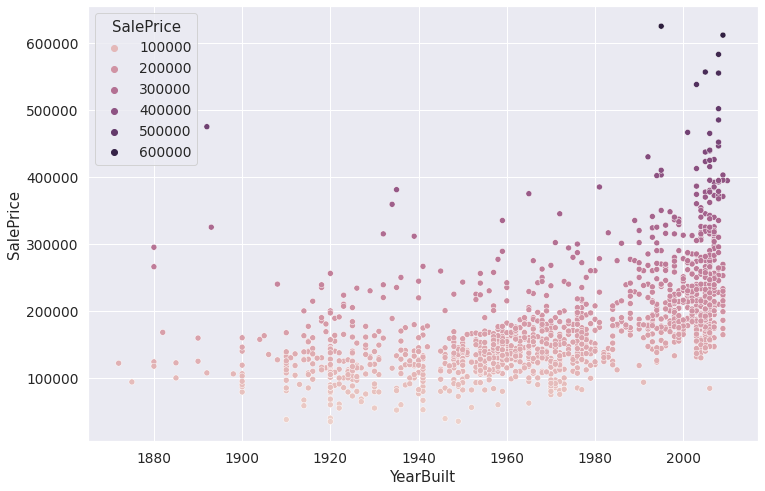

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train,hue='SalePrice')

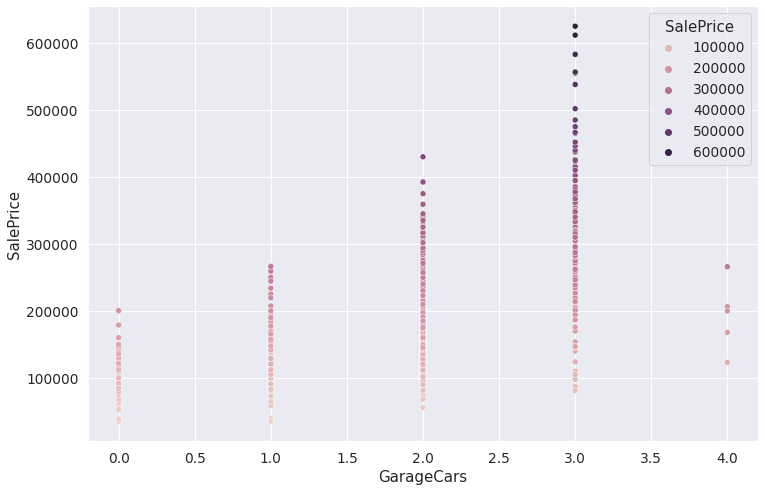

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='GarageCars',y='SalePrice',data=train,hue='SalePrice')

In [ ]:
# Outliers Treatment

#Drop observations where GrLivArea is greater than 4000 sq.ft'''
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

#Drop observations where TotalBsmtSF is greater than 3000 sq.ft
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

#Drop observations where YearBulit is less than 1893 sq.ft
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

#Drop observations where GarageCars is greater than 3
train.drop(train[train.GarageCars>3].index, inplace = True)
train.reset_index(drop = True, inplace = True)

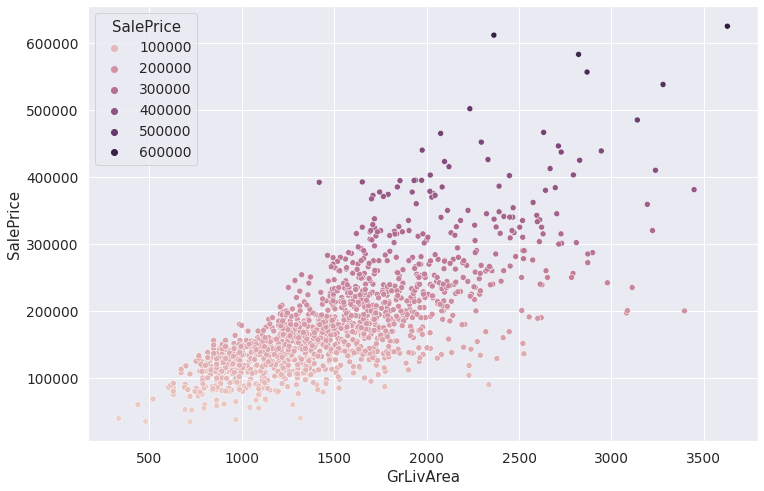

In [ ]:
# Verifying Correlation in between GrLivArea & SalePrice after dropping out the Outliers

plt.figure(figsize=(12,8))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train,hue='SalePrice')

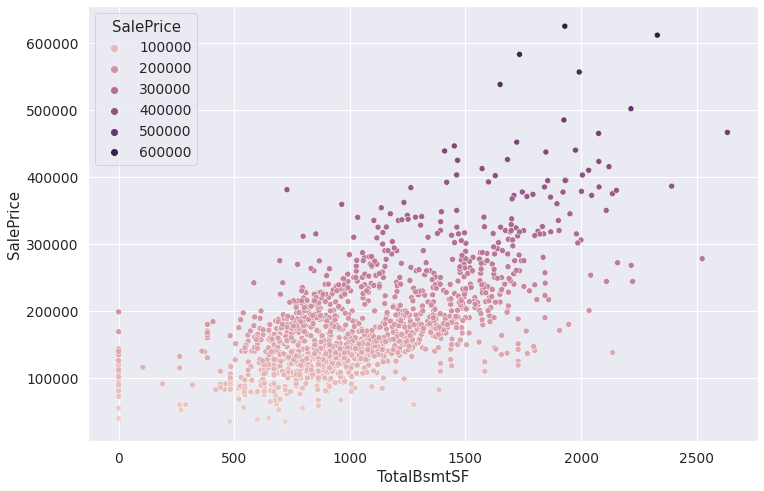

In [ ]:
# Verifying Correlation in between TotalBsmtSF & SalePrice after dropping out the Outliers

plt.figure(figsize=(12,8))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train,hue='SalePrice')

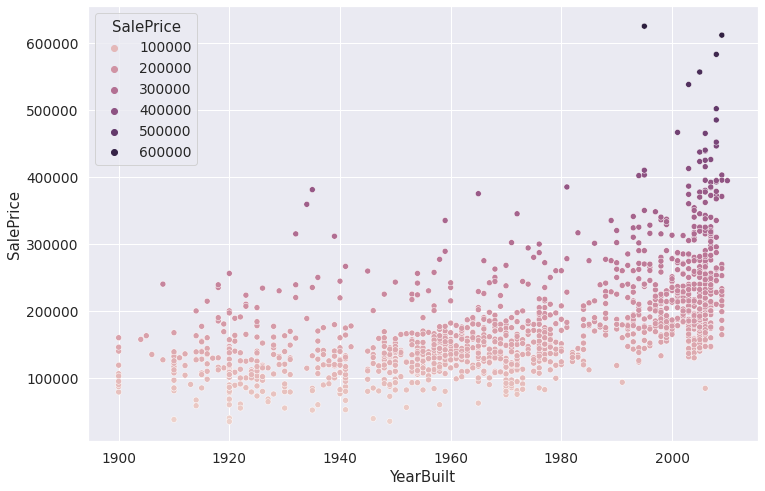

In [ ]:
# Verifying Correlation in between YearBuilt & SalePrice after dropping out the Outliers

plt.figure(figsize=(12,8))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train,hue='SalePrice')

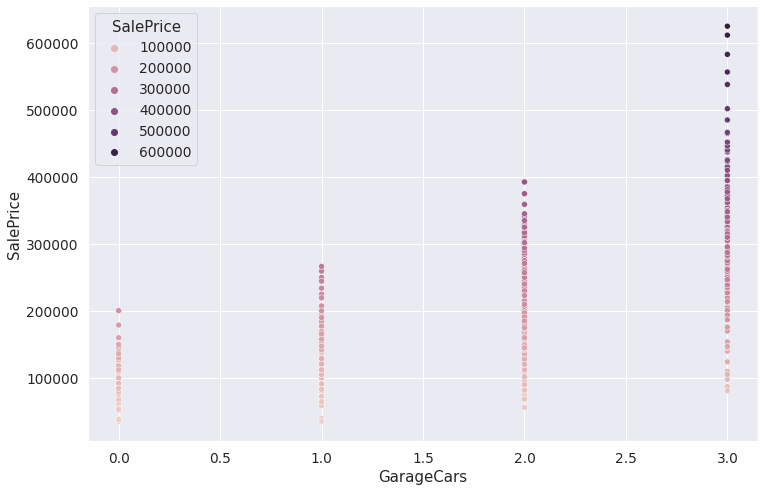

In [ ]:
# Verifying Correlation in between GarageCars & SalePrice after dropping out the Outliers

plt.figure(figsize=(12,8))
sns.scatterplot(x='GarageCars',y='SalePrice',data=train,hue='SalePrice')

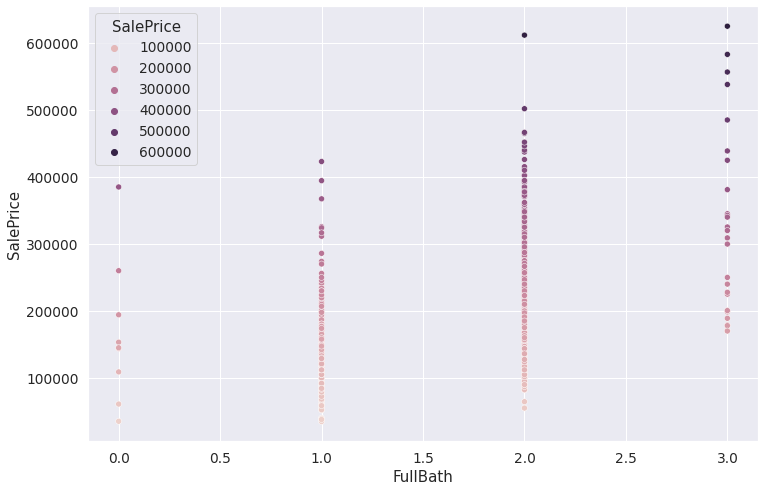

In [ ]:
# Verifying the Linear Relationship in between FullBatch & SalePrice

plt.figure(figsize=(12,8))
sns.scatterplot(x='FullBath',y='SalePrice',data=train,hue='SalePrice')

**Inputting Missing Variables**

The best way to handle the missing variables is feeding the missing values with its Mean, Median or Mode depending on its distribution and variable type either categorical or numerical.

In [ ]:
#Separating the Target variable, SalePrice
y_train = train.SalePrice

#Dropping the variable 'SalePrice' from train data
train.drop('SalePrice', axis = 1, inplace = True)

#Let's combine both Train and Test data frames
df_merged = pd.concat([train, test], axis = 0)

#Verify the new merged data frame dimension
df_merged.shape

(2919, 80)

In [ ]:
#Now convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold to Categorical variables

df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

In [ ]:
#Columns with Missing Values
missing_columns = df_merged.columns[df_merged.isnull().any()].values

#Number of Columns with Missing Values
total_missing_columns = np.count_nonzero(df_merged.isnull().sum())
print('We have ' , total_missing_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  34 features with missing values and those features (with missing values) are: 

 ['MSZoning' 'LotFrontage' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Electrical' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence'
 'MiscFeature' 'SaleType']


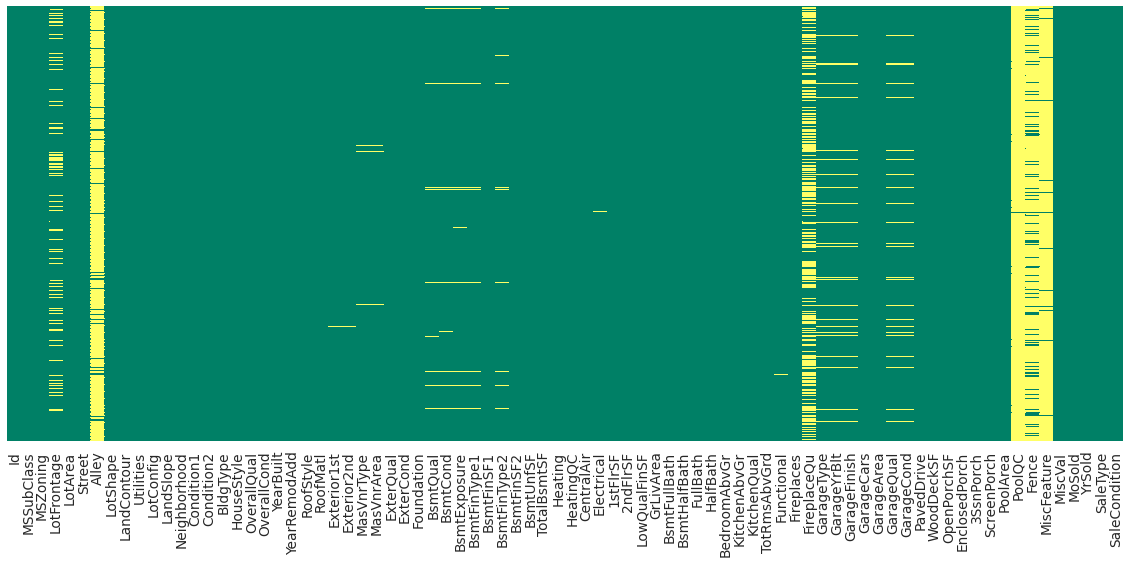

In [ ]:
#Visualization of missing variable values

plt.figure(figsize=(20,8))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [ ]:
#Get the missing variables and their corresponding number of missing values
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
missing_columns

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

Variables such as PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu have most missing variables. We can drop them but it would better to replace the missing values and other values with 'None' to retain the originalaity of given dataset

In [ ]:
#Replacing Variables values by 'None' for all NaN (which is something)
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [ ]:
#All the categorical variables and will be replaced by their MODE value
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [ ]:
#All the Discrete Numerical Variables or Continuous Numerical Variables will be replaced by their MEDIAN value
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

Only Variable left out with highest missing data is 'LotFrontage'. Need to handle this by taking any non-missing variable median or mode

In [ ]:
#Lets convert the Categorical Variable 'LotFrontage' into Numerical to plot correlation
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,619,1,1,3,3,0,4,0,5,2,2,0,5,6,4,110,53,1,1,12,13,1,148,2,4,2,2,4,3,2,513,6,0,107,261,1,0,1,4,197,356,0,766,1,0,2,1,3,1,2,6,6,0,3,1,94,2,2,283,5,5,2,0,52,0,0,0,0,3,4,1,0,1,2,8,4
1,0,3,895,1,1,3,3,0,2,0,24,1,2,0,2,5,7,83,26,1,1,8,8,2,0,3,4,1,2,4,1,0,717,6,0,230,604,1,0,1,4,563,0,0,384,0,1,2,0,3,1,3,4,6,1,5,1,67,2,2,202,5,5,2,244,0,0,0,0,0,3,4,1,0,4,1,8,4


In [ ]:
#Inserting LotFrontage in variable correlation
df['LotFrontage'] = df_merged['LotFrontage']
# Move LotFrontage to index 0.
df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,619,1,1,3,3,0,4,0,5,2,2,0,5,6,4,110,53,1,1,12,13,1,148,2,4,2,2,4,3,2,513,6,0,107,261,1,0,1,4,197,356,0,766,1,0,2,1,3,1,2,6,6,0,3,1,94,2,2,283,5,5,2,0,52,0,0,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,895,1,1,3,3,0,2,0,24,1,2,0,2,5,7,83,26,1,1,8,8,2,0,3,4,1,2,4,1,0,717,6,0,230,604,1,0,1,4,563,0,0,384,0,1,2,0,3,1,3,4,6,1,5,1,67,2,2,202,5,5,2,244,0,0,0,0,0,3,4,1,0,4,1,8,4


In [ ]:
corr_mat = df.corr()
display(corr_mat['LotFrontage'].sort_values(ascending = False)[:5])
display(corr_mat['LotFrontage'].sort_values(ascending = False)[-5:])
#corr_mat.style.background_gradient(cmap = 'coolwarm').set_precision(2)

LotFrontage    1.000000
LotArea        0.635076
1stFlrSF       0.423336
GarageArea     0.365235
GrLivArea      0.353603
Name: LotFrontage, dtype: float64

KitchenQual   -0.200020
GarageType    -0.291572
MSSubClass    -0.384061
BldgType      -0.474990
Utilities           NaN
Name: LotFrontage, dtype: float64

Among these, only 'BldgType' categorical variable has the highest correlation with 'LotFrontage'. Replace 'LotFrontage' values with MEDIAN of 'BldgType'

In [ ]:
#Replace LotFrontage with MEDIAN of respective columns of BldgType
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
#Verify if any variables with missing values still present in the dataset
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


**Transformation of Distributions**

In [ ]:
#Finding the Skewness and Kurtosis of 'SalePrice'
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

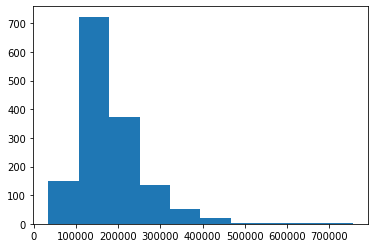

In [ ]:
#Plot the distribution of SalePrice with skewness

plt.hist(y_train)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

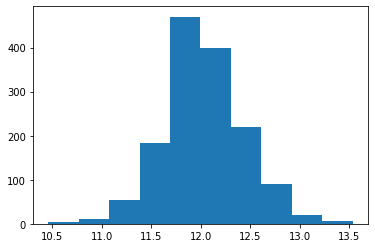

In [ ]:
#Plot the distribution of SalePrice with skewness

y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
plt.hist(y_train)

In [ ]:
#Calculate the rest of the Explanetory variables
skew_num = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

,Skewness
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148275
EnclosedPorch,4.005950
ScreenPorch,3.948723
BsmtHalfBath,3.933616


<BarContainer object of 32 artists>

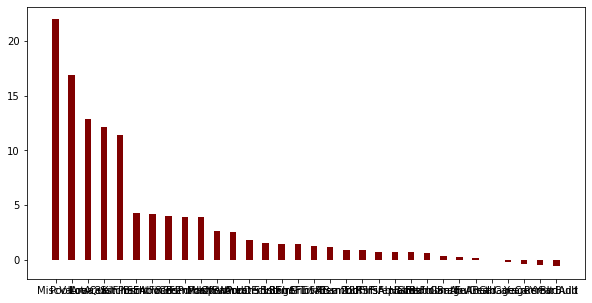

In [ ]:
#Plotting the Skewness for rest of the Explanetory variables
plt.figure(figsize = (10, 5))
plt.bar(skew_num_sorted.index, skew_num_sorted.Skewness, color ='maroon', width = 0.4)

In [ ]:
#Extract Numeric Variables from merged data
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [ ]:
#Tranformation of the Explanetory Variables
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew() > 0.5].index])

#Normal variables
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew() < 0.5].index]
    
#Merging
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [ ]:
df_merged_num.columns


Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [ ]:
df_merged_num_all.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Id', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

**Feature Scaling**

In [ ]:
#Standarize numeric features with RobustScaler
from sklearn.preprocessing import RobustScaler

#Creating Scaler Object
scaler = RobustScaler()

#Fit scaler object on train data
scaler.fit(df_merged_num)

#Apply scaler object to both train and test data.'''
df_merged_num_scaled = scaler.transform(df_merged_num)

#Retrive column names. Pass the index of index df_merged_num, otherwise it will sum up the index.
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)


**Encoding Categorical Variables**

In [ ]:
#Extract categorical variables first and convert them into category & Label encoding with ordinal values

df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

All the encodeded variables are dtype int64 except OverallQual and OverallCond. So convert them back into int64

In [ ]:
#Convert 'OverallQual' & 'OverallCond' to int64 dtype
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

#Extract Label Encoded Variables
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

One Hot Encoding Categorical variables without any inherent order will be converted into numerical for the model using pandas get_dummies method

In [ ]:
#Selecting the Nominal Vaiables for One Hot encording
df_merged_one_hot = df_merged_cat.select_dtypes(include=['category'])

#Let's get the dummies variable
df_merged_one_hot = pd.get_dummies(df_merged_one_hot, drop_first=True)

In [ ]:
#Concatanate One Hot Encoded and Label Encoded Variables together
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis=1)

#Finally join processed categorical and numerical variables
df_merged_processed = pd.concat([df_merged_cat, df_merged_encoded], axis=1)

#Dimensions of new data frame
df_merged_processed.shape

(2919, 241)

Splitting the Data into Train & Test Data

In [ ]:
#Now retrive train and test data for modelling
df_train_final = df_merged_processed.iloc[0:1438, :]
df_test_final = df_merged_processed.iloc[1438:, :]

#And we have our target variable as y_train
y_train = y_train

In [ ]:
#Updated Train Data
df_train_final.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,60,RL,Pave,None,3,3,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,1,6,1,GasA,4,Y,4,2,6,0,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,1,2,7,5,2,2,3,3,1,6,1,4,4,2,6,0,2,3,3,2,0,0
1,20,RL,Pave,None,3,3,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,1,2,CBlock,3,3,4,5,1,GasA,4,Y,4,1,6,3,Attchd,2,3,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,1,2,6,8,1,2,3,3,4,5,1,4,4,1,6,3,2,3,3,2,0,0
2,60,RL,Pave,None,2,3,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,2,6,1,GasA,4,Y,4,2,6,3,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,3,1,2,7,5,2,2,3,3,2,6,1,4,4,2,6,3,2,3,3,2,0,0
3,70,RL,Pave,None,2,3,1,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,1,2,BrkTil,2,4,1,5,1,GasA,3,Y,4,2,6,4,Detchd,1,3,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,3,1,2,7,5,1,2,2,4,1,5,1,3,4,2,6,4,1,3,3,2,0,0
4,60,RL,Pave,None,2,3,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,3,6,1,GasA,4,Y,4,2,6,3,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,3,1,2,8,5,2,2,3,3,3,6,1,4,4,2,6,3,2,3,3,2,0,0


In [ ]:
#Updated Test Data
df_train_final.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,60,RL,Pave,None,3,3,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,1,6,1,GasA,4,Y,4,2,6,0,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,1,2,7,5,2,2,3,3,1,6,1,4,4,2,6,0,2,3,3,2,0,0
1,20,RL,Pave,None,3,3,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,1,2,CBlock,3,3,4,5,1,GasA,4,Y,4,1,6,3,Attchd,2,3,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,1,2,6,8,1,2,3,3,4,5,1,4,4,1,6,3,2,3,3,2,0,0
2,60,RL,Pave,None,2,3,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,2,6,1,GasA,4,Y,4,2,6,3,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,3,1,2,7,5,2,2,3,3,2,6,1,4,4,2,6,3,2,3,3,2,0,0
3,70,RL,Pave,None,2,3,1,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,1,2,BrkTil,2,4,1,5,1,GasA,3,Y,4,2,6,4,Detchd,1,3,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,3,1,2,7,5,1,2,2,4,1,5,1,3,4,2,6,4,1,3,3,2,0,0
4,60,RL,Pave,None,2,3,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,3,6,1,GasA,4,Y,4,2,6,3,Attchd,2,3,3,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,3,1,2,8,5,2,2,3,3,3,6,1,4,4,2,6,3,2,3,3,2,0,0


**Model Building and Evaluation**

Train the regression models with the processed data.

In [ ]:
#Understand the Data Dimensions of Training Data Set
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:', y_train.shape)
print('Test data dimension:', df_test_final.shape)

Input matrix dimension: (1438, 241)
Output vector dimension: (1460,)
Test data dimension: (1481, 241)


In [ ]:
#set a seed for reproducibility'''
seed = 48

#Initialize all the regesssion models object we are interested in
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#All initialized with default parameters except random_state and n_jobs.'''
lr = LinearRegression(n_jobs = -1)
dt = DecisionTreeRegressor(random_state = seed)
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)

In [ ]:
#Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared)
def train_r2(model):
  model.fit(df_train_final, y_train)
  return model.score(df_train_final, y_train)

#Calculate and plot the training accuracy
models = [lr, dt, rf, gb]
training_score = []
for model in models:
  training_score.append(train_r2(model))

#Plot dataframe of training accuracy
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'DT', 'RF', 'GB']
train_score = (train_score*100).round(4)

**Conclusion of EDA**

The most valuable feature in this data set is GrLivArea. 

Lot Shape irregular (IR2 & IR3) is one of the major feature in lowering the Sale Price. 'Roof Material' of a home with 'clay or tile' removes the most value. Interestingly, being next to a park or other outdoor feature also reduces the value of the home. 